<a href="https://colab.research.google.com/github/Nikolay-12/quantum_chem_prac/blob/main/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D1%85%D0%B8%D0%BC_%D1%8D%D0%BA%D1%81%D1%82%D1%80%D0%B0%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87_%D0%B1%D0%B0%D0%B7%D0%B8%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyscf
!pip install matplotlib
!pip install scipy
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 16.6 MB/s eta 0:00:00


In [ ]:
from pyscf import gto, scf
#create a molecular object
mol = gto.Mole()
#define output level
mol.verbose = 4
#fill atoms and coordinates
mol.atom = '''
Br       -1.6944    0.5144    0.1171
Cl       1.2893    1.0625    0.1344
C        0.0725   -0.1020   -0.4182
C        0.3327   -1.4749    0.1666
H        0.0807   -0.1249   -1.5112
H        1.3160   -1.8491   -0.1381
H        -0.4161   -2.1967   -0.1783
H        0.2997   -1.4658    1.2622
'''
#choose basis
mol.basis = 'ccpv5z'
#collect all into one object
mol.build()
#choose method
mf = scf.RHF(mol)
#start calculation
E1 = mf.kernel()

System: uname_result(system='Linux', node='a45eebed0fb1', release='6.6.105+', version='#1 SMP Thu Oct  2 10:42:05 UTC 2025', machine='x86_64')  Threads 2
Python 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy 2.0.2  scipy 1.16.3  h5py 3.15.1
Date: Fri Oct 31 08:51:31 2025
PySCF version 2.11.0
PySCF path  /usr/local/lib/python3.12/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 8
[INPUT] num. electrons = 68
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 Br    -1.694400000000   0.514400000000   0.117100000000 AA   -3.201951945463   0.972075118476   0.221286929187 Bohr   0.0
[INPUT]  2 Cl     1.289300000000   1.062500000000   0.134400000000 AA    2.436423892402   2.007834007350   0.253979191142 Bohr   0.0
[INPUT]  3 C  

In [ ]:
#add energies here
E1 = -3076.38675022489 #(sto-3g; time: 1 сек)
E2 = -3094.96949419171 #(3-21g; time: 0 сек)

E3 = -3109.95446557321 #(ccpvdz; time: 3 сек)
E4 = -3110.07114241019 #(ccpvtz; time: 26 сек)
E5 = -3110.08320834959 #(ccpvqz; time: примерно 15 мин)
E6 = -3110.08587234548 #(ccpv5z; time: > 1,5 часа)

E7 = -3110.01748973041 #(def2-tzvp; time: 13 сек)
E8 = -3110.08464258579 #(def2-qzvp; time: 16 мин)
E9 = 0 #(def2-5zvp; time: не удалось посчитать)

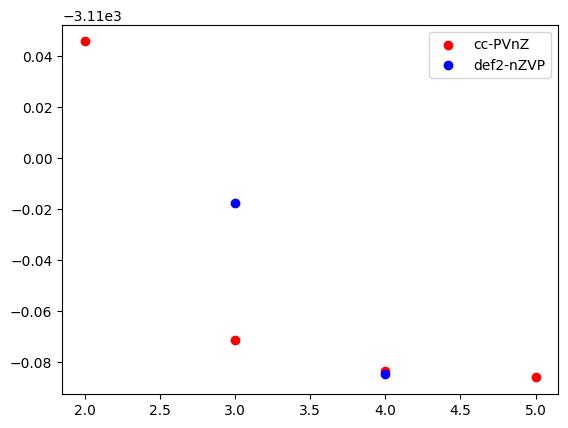

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#plt.scatter([3], [E1], label="sto-3g")
#plt.scatter([3], [E2], label="3-21g")
ax.scatter([2,3,4,5], [E3,E4,E5,E6], label="cc-PVnZ", c="red")
ax.scatter([3,4], [E7,E8], label="def2-nZVP", c="blue")
ax.legend()
plt.show()

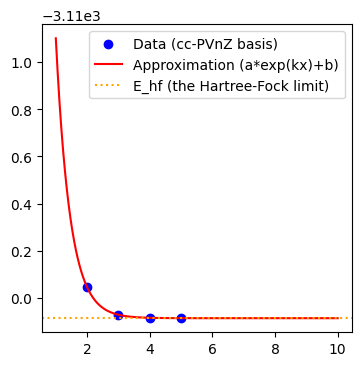

Parameters: a= 10.728568371599577 ; k= -2.2026648459943776 ; b= -3110.0854905552947


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def model_func(x, a, k, b):
    return a * np.exp(k*x) + b

# data
x = np.array([2,3,4,5])
y = np.array([E3,E4,E5,E6])

p0 = (1., -1., -3110.)
params, pcov = curve_fit(model_func, x, y, p0)
a, k, b = params

x2 = np.linspace(1, 10, 10000)
y2 = model_func(x2, a, k, b)

fig,ax = plt.subplots(figsize = (4,4))

ax.scatter(x, y, color = 'blue', label="Data (cc-PVnZ basis)")
ax.plot(x2, y2, color = 'red', label="Approximation (a*exp(kx)+b)")
ax.axhline(y=b, color='orange', linestyle='dotted', label="E_hf (the Hartree-Fock limit)")

ax.legend()
plt.show()

print("Parameters: a=", a, "; k=", k, "; b=", b)